In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data['Age'] = data.Year_Birth.apply(lambda x: 2022 - int(x))
plt.plot()

In [6]:
from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
curr = datetime.now()
data['Days_Since_Customer'] = data.Dt_Customer.apply(lambda x: (curr - x).total_seconds()/ (60 * 60 * 24))

In [7]:
map = {'Absurd': 1, 'Alone': 1, 'YOLO': 1, 'Single': 1,
              'Married': 2, 'Together': 2, 'Widow': 1, 'Divorced': 1}

In [8]:
data['Marital_Status'] = data.Marital_Status.map(map)

In [9]:
data['N_Kids'] = data.Kidhome.values + data.Teenhome.values
data['F_Size'] = data.Marital_Status.values + data.N_Kids.values

In [10]:
data['N_Accepted'] = data.AcceptedCmp1.values + data.AcceptedCmp2.values + \
                                data.AcceptedCmp3.values + data.AcceptedCmp4.values + \
                                data.AcceptedCmp5.values


In [11]:
data['MntTotal'] = data['MntWines'].values + data['MntFruits'].values + \
                            data['MntMeatProducts'].values + data['MntFishProducts'].values + \
                            data['MntWines'].values + data['MntSweetProducts'].values + \
                            data['MntGoldProds'].values

In [12]:
data.drop(['Dt_Customer', 'Year_Birth', 'AcceptedCmp1', 'AcceptedCmp2',
                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Kidhome', 'Teenhome',
                   'Z_CostContact', 'Z_Revenue', 'N_Kids', 'Marital_Status'],
                   axis=1, inplace=True)

In [13]:
data

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,F_Size,N_Accepted,MntTotal
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,...,10,4,7,0,1,65,3867.81845,1,0,2252
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,...,1,2,5,0,0,68,3021.81845,3,0,38
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,...,2,10,4,0,0,57,3368.81845,2,0,1202
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,...,0,4,6,0,0,38,2961.81845,3,0,64
4,5324,PhD,58293.0,94,173,43,118,46,27,15,...,3,6,5,0,0,41,3217.81845,3,0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,61223.0,46,709,43,182,42,118,247,...,3,4,5,0,0,55,3437.81845,3,0,2050
2236,4001,PhD,64014.0,56,406,0,30,0,0,8,...,2,5,7,0,0,76,2957.81845,5,1,850
2237,7270,Graduation,56981.0,91,908,48,217,32,12,24,...,3,13,6,0,0,41,3211.81845,1,1,2149
2238,8235,Master,69245.0,8,428,30,214,80,30,61,...,5,10,3,0,0,66,3212.81845,3,0,1271


In [14]:
data.isnull().sum()

ID                      0
Education               0
Income                 24
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
Age                     0
Days_Since_Customer     0
F_Size                  0
N_Accepted              0
MntTotal                0
dtype: int64

In [15]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [16]:
data

,ID,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Days_Since_Customer,F_Size,N_Accepted,MntTotal
0,5524,Graduation,58138.0,58,635,88,546,172,88,88,...,10,4,7,0,1,65,3867.81845,1,0,2252
1,2174,Graduation,46344.0,38,11,1,6,2,1,6,...,1,2,5,0,0,68,3021.81845,3,0,38
2,4141,Graduation,71613.0,26,426,49,127,111,21,42,...,2,10,4,0,0,57,3368.81845,2,0,1202
3,6182,Graduation,26646.0,26,11,4,20,10,3,5,...,0,4,6,0,0,38,2961.81845,3,0,64
4,5324,PhD,58293.0,94,173,43,118,46,27,15,...,3,6,5,0,0,41,3217.81845,3,0,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,61223.0,46,709,43,182,42,118,247,...,3,4,5,0,0,55,3437.81845,3,0,2050
2236,4001,PhD,64014.0,56,406,0,30,0,0,8,...,2,5,7,0,0,76,2957.81845,5,1,850
2237,7270,Graduation,56981.0,91,908,48,217,32,12,24,...,3,13,6,0,0,41,3211.81845,1,1,2149
2238,8235,Master,69245.0,8,428,30,214,80,30,61,...,5,10,3,0,0,66,3212.81845,3,0,1271


In [17]:
data.isnull().sum()

ID                     0
Education              0
Income                 0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
Age                    0
Days_Since_Customer    0
F_Size                 0
N_Accepted             0
MntTotal               0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
enc = LabelEncoder()
data['Education'] = enc.fit_transform(data['Education'])

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
x, y = data.drop('Response', axis=1).values, data['Response'].values


In [22]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

In [23]:
ct = ColumnTransformer([
        ('numeric', StandardScaler(), list(range(1, len(x.T))))
])

In [24]:
x_transformed = ct.fit_transform(x)
print(x_transformed[0])

[-0.35014129  0.23532677  0.30703926  0.98378127  1.55157698  1.67970233
  2.46214705  1.4765001   0.84320691  0.34941394  1.40930394  2.51089024
 -0.55078479  0.69390374 -0.09728167  0.98534473  1.97674456 -1.75911463
 -0.43903713  1.4669731 ]


In [25]:
from sklearn.decomposition import PCA

In [26]:
pca = PCA(n_components=3)
pca.fit(x_transformed)
x_reduced = pca.transform(x_transformed)
print(x_reduced[0])

[4.18123143 0.76928788 2.14353548]


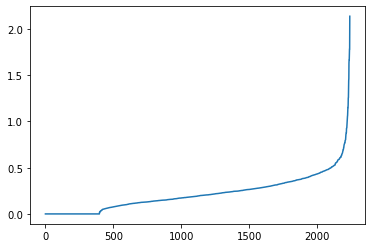

In [27]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(x_reduced)
dist,idx  = nbrs.kneighbors(x_reduced)
dist = np.sort(dist,axis=0)
dist = dist[:,1]
plt.plot(dist)

##### for eps =0.47

In [28]:
db = DBSCAN(eps=0.47, min_samples=26)

In [29]:
db.fit(x_reduced)

DBSCAN(eps=0.47, min_samples=26)

In [30]:
y= db.fit_predict(x_reduced)

In [31]:
y  # -1 are noise

array([-1,  0, -1, ..., -1, -1, -1], dtype=int64)

In [32]:
np.unique(y)

array([-1,  0], dtype=int64)

In [33]:
from sklearn.metrics import silhouette_score
silhouette_score(x,y)

0.28932653594653956